In [1]:
from astropy import units as u
from astropy.time import Time

from poliastro.bodies import Sun, Venus, Earth, Jupiter, Saturn
from poliastro.frames import Planes
from poliastro.ephem import Ephem
from poliastro.plotting import StaticOrbitPlotter
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.util import time_range

/home/fbrunodr/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


([<matplotlib.lines.Line2D at 0x7f9fcc5c1ff0>],
 <matplotlib.lines.Line2D at 0x7f9fcc5c1bd0>)

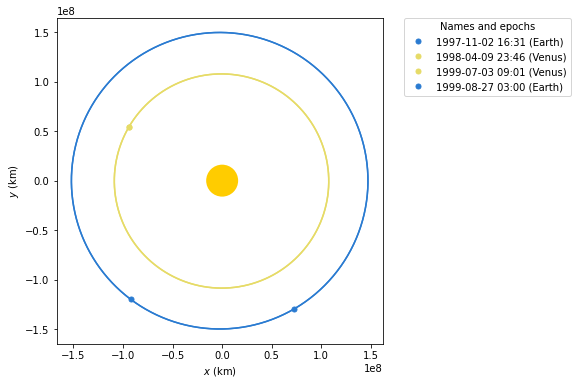

In [2]:
T0 = Time("J2000", scale="tdb") -789.8117 * u.day
t1 = T0 + 158.302027105278 * u.day
t2 = t1 + 449.385873819743 * u.day
t3 = t2 + 54.7489684339665 * u.day
t4 = t3 + 1024.36205846918 * u.day
t5 = t4 + 4552.30796805542 * u.day

plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, T0, label="Earth")
plotter.plot_body_orbit(Venus, t1, label="Venus")
plotter.plot_body_orbit(Venus, t2, label="Venus")
plotter.plot_body_orbit(Earth, t3, label="Earth")

In [3]:
# Ephemerides
earth = Ephem.from_body(Earth, time_range(T0, end=t3), plane=Planes.EARTH_ECLIPTIC)
venus = Ephem.from_body(Venus, time_range(T0, end=t3), plane=Planes.EARTH_ECLIPTIC)
jupiter = Ephem.from_body(Jupiter, time_range(T0, end=t5), plane=Planes.EARTH_ECLIPTIC)
saturn = Ephem.from_body(Saturn, time_range(T0, end=t5), plane=Planes.EARTH_ECLIPTIC)

In [4]:
# First maneuver
ship = Orbit.from_ephem(Sun, earth, T0)
venus_orbit = Orbit.from_ephem(Sun, venus, t1)

first_maneuver = Maneuver.lambert(ship, venus_orbit)[0]
first_trajectory = ship.apply_maneuver([first_maneuver])
first_trajectory = Ephem.from_orbit(first_trajectory, time_range(T0, end=t1), plane=Planes.EARTH_ECLIPTIC)

In [10]:
# Second maneuver
ship = Orbit.from_ephem(Sun, venus, t1)
venus_orbit = Orbit.from_ephem(Sun, venus, t2 + 1 * u.day)

second_maneuver = Maneuver.lambert(ship, venus_orbit, M=1)[0]
second_trajectory = ship.apply_maneuver([second_maneuver])
second_trajectory = Ephem.from_orbit(second_trajectory, time_range(t1, end=t2), plane=Planes.EARTH_ECLIPTIC)

In [6]:
# Third maneuver
ship = Orbit.from_ephem(Sun, venus, t2)
earth_orbit = Orbit.from_ephem(Sun, earth, t3)

third_maneuver = Maneuver.lambert(ship, earth_orbit)[0]
third_trajectory = ship.apply_maneuver([third_maneuver])
third_trajectory = Ephem.from_orbit(third_trajectory, time_range(t2, end=t3), plane=Planes.EARTH_ECLIPTIC)

In [7]:
# Fourth maneuver
ship = Orbit.from_ephem(Sun, earth, t3)
jupiter_orbit = Orbit.from_ephem(Sun, jupiter, t4)

fourth_maneuver = Maneuver.lambert(ship, jupiter_orbit)[0]
fourth_trajectory = ship.apply_maneuver([fourth_maneuver])
fourth_trajectory = Ephem.from_orbit(fourth_trajectory, time_range(t3, end=t4), plane=Planes.EARTH_ECLIPTIC)

In [8]:
# Fifth maneuver
ship = Orbit.from_ephem(Sun, jupiter, t4)
saturn_orbit = Orbit.from_ephem(Sun, saturn, t5)

fifth_maneuver = Maneuver.lambert(ship, saturn_orbit)[0]
fifth_trajectory = ship.apply_maneuver([fifth_maneuver])
fifth_trajectory = Ephem.from_orbit(fifth_trajectory, time_range(t4, end=t5), plane=Planes.EARTH_ECLIPTIC)

([<matplotlib.lines.Line2D at 0x7f9fc834bf70>], None)

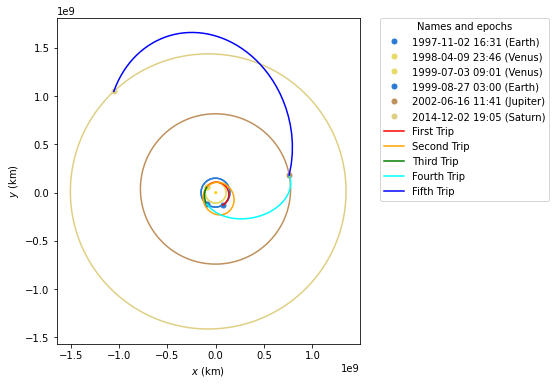

In [12]:
plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, T0, label="Earth")
plotter.plot_body_orbit(Venus, t1, label="Venus")
plotter.plot_body_orbit(Venus, t2, label="Venus")
plotter.plot_body_orbit(Earth, t3, label="Earth")
plotter.plot_body_orbit(Jupiter, t4, label="Jupiter")
plotter.plot_body_orbit(Saturn, t5, label="Saturn")

plotter.plot_ephem(first_trajectory, label="First Trip", color='red')
plotter.plot_ephem(second_trajectory, label="Second Trip", color='orange')
plotter.plot_ephem(third_trajectory, label="Third Trip", color='green')
plotter.plot_ephem(fourth_trajectory, label="Fourth Trip", color='cyan')
plotter.plot_ephem(fifth_trajectory, label="Fifth Trip", color='blue')